In [111]:
import imageio
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LogNorm
from matplotlib import ticker

# Project source files
from utils import *
from ols import *
from ridge import *
from logistic import *
from neural import *
from FeedForwardNeuralNetwork import *
from StochasticGradientDescent import *

In [24]:
# Setting up pyplot runtime configuration

from matplotlib.ticker import MaxNLocator

SMALL = 12
MEDIUM = 16
LARGE = 20
THICK = 4
THIN = 3
WIDE_FIG = (20,6)
SMALL_FIG = (6,6)
OPACITY = .25


plt.style.context('fivethirtyeight')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='black', axisbelow=True, grid=True)
plt.rc('grid', color='white', linestyle='solid')
plt.rc('lines', linewidth=THICK)

plt.rc('font', size=SMALL, weight='bold')          # default text sizes
plt.rc('axes', titlesize=MEDIUM)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM)    # legend fontsize
plt.rc('figure', titlesize=LARGE)  # fontsize of the figure title

COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

<ipython-input-23-681b4097d251>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/i**k
<ipython-input-23-681b4097d251>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/i**k
<ipython-input-23-681b4097d251>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/i**k


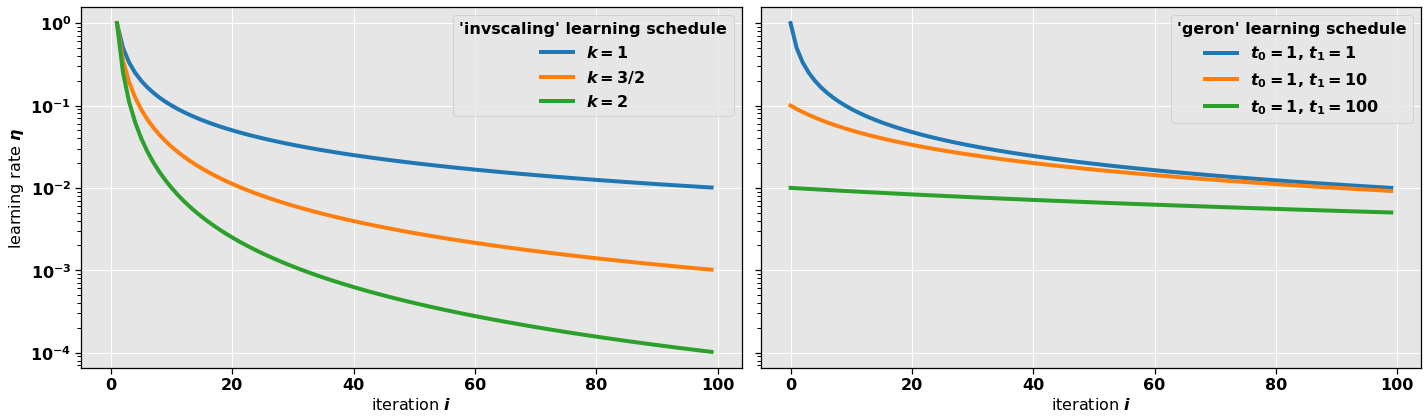

In [23]:
## Learning schedules

def invscaling(i, k):
    return 1/i**k

def geron(i, t1):
    return 1/(i + t1)

x = np.arange(100)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=WIDE_FIG)
ax = axes[0]
ax.plot(x, invscaling(x, 1))
ax.plot(x, invscaling(x, 3/2))
ax.plot(x, invscaling(x, 2))
ax.legend(['$k=1$', '$k=3/2$', '$k=2$'], title=f"'invscaling' learning schedule", fontsize=MEDIUM, title_fontsize=MEDIUM, loc='upper right')
ax.set_yscale('log')

ax = axes[1]
ax.plot(x, geron(x, 1))
ax.plot(x, geron(x, 10))
ax.plot(x, geron(x, 100))
ax.legend(['$t_0=1$, $t_1=1$', '$t_0=1$, $t_1=10$', '$t_0=1$, $t_1=100$'], title=f"'geron' learning schedule", fontsize=MEDIUM, title_fontsize=MEDIUM, loc='upper right')
ax.set_yscale('log')

ax = axes[0]
ax.set_ylabel('learning rate $\eta$')
ax.set_xlabel('iteration $i$')

ax = axes[1]
ax.set_xlabel('iteration $i$')


plt.tight_layout()
plt.show()

In [187]:
n = 100
np.random.seed(0)
x = np.random.rand(n,1)
y = 1 + 2*x + .75*np.random.randn(n,1)
X = np.c_[np.ones(n), x]
ols = np.linalg.inv(X.T @ X) @ X.T @ y
print('ols-inversion:\n', ols)

sgd = SGD(epochs=20, batches=10, eta0=.5, learning_schedule='constant', regression='linear')
ols_sgd = sgd.run(X, y)
print('ols-sgd:\n', ols_sgd)

sgd = SGD(epochs=20, batches=10, eta0=.7, learning_schedule='constant', regression='linear')
ridge_sgd = sgd.run(X, y, lmd=.01)
print('ridge-sgd:\n', ridge_sgd)

ols-inversion:
 [[1.16661331]
 [1.95270127]]
ols-sgd:
 [[0.87732987]
 [1.83442628]]
ridge-sgd:
 [[1.10521815]
 [1.82646326]]


In [149]:
np.random.seed(0)
X = np.random.rand(3,3) + np.eye(3)
X = add_intercept(X)
Y = np.eye(3)
sgd = SGD(epochs=100, batch_size=1, eta0=.5, learning_schedule='constant', regression='logistic')
B = sgd.run(X, Y)
P = softmax(X @ B)

In [150]:
df = DataFrame()
df['case'] = ['1', '2', '3']
df['intercept'] = X[:,0].astype(np.int32)
df['$p_1$'] = X[:,1]
df['$p_2$'] = X[:,2]
df['$p_3$'] = X[:,3]
df['class 1'] = Y[:,0].astype(np.int32)
df['class 2'] = Y[:,1].astype(np.int32)
df['class 3'] = Y[:,2].astype(np.int32)
print(df.to_latex(index=False))

\begin{tabular}{lrrrrrrr}
\toprule
case &  intercept &     \$p\_1\$ &     \$p\_2\$ &     \$p\_3\$ &  class 1 &  class 2 &  class 3 \\
\midrule
   1 &          1 &  1.548814 &  0.715189 &  0.602763 &        1 &        0 &        0 \\
   2 &          1 &  0.544883 &  1.423655 &  0.645894 &        0 &        1 &        0 \\
   3 &          1 &  0.437587 &  0.891773 &  1.963663 &        0 &        0 &        1 \\
\bottomrule
\end{tabular}



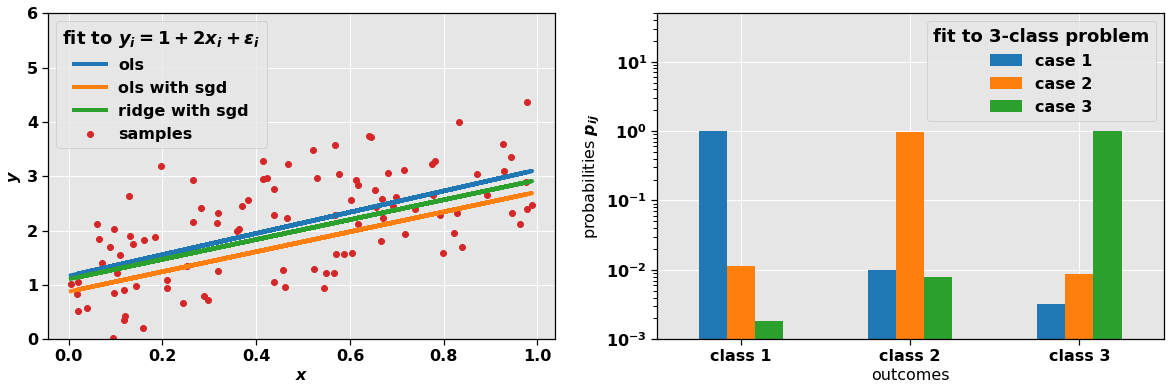

In [188]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=WIDE_FIG)
ax = axes[0]
ax.scatter(x, y, color=COLORS[3], label='samples')
ax.plot(x, ols[0]+ols[1]*x)
ax.plot(x, ols_sgd[0]+ols_sgd[1]*x)
ax.plot(x, ridge_sgd[0]+ridge_sgd[1]*x)
ax.set_ylim(0,6)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(['ols', 'ols with sgd', 'ridge with sgd', 'samples'], title=r'fit to $y_i = 1 + 2x_i + \varepsilon_i$', loc='upper left')

ax = axes[1]
df = DataFrame()
df['case 1'] = P[0]
df['case 2'] = P[1]
df['case 3'] = P[2]
df['x'] = ['class 1','class 2','class 3']
df.plot(x='x', ax=ax, kind='bar', rot=0)
ax.set_xlabel('outcomes')
ax.set_ylabel('probabilities $p_{ij}$')
ax.set_yscale('log')
ax.set_ylim(.001,50)
ax.legend(title='fit to 3-class problem', loc='upper right')

plt.show()